## Load and Clean the Data

### Load the data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_json('transactions.txt', lines=True)
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


### Explore the data

In [50]:
df.shape

(786363, 29)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [52]:
print('Latest date: ', pd.to_datetime(df['transactionDateTime']).max())
print('Earliest date: ', pd.to_datetime(df['transactionDateTime']).min())

Latest date:  2016-12-30 23:59:45
Earliest date:  2016-01-01 00:01:02


- Dataset has information for 786363 transactions
- There are 29 variables
- The data covers transactions between January and December 2016

### Explore target variable

In [54]:
df['isFraud'].value_counts()

isFraud
False    773946
True      12417
Name: count, dtype: int64

Out of 786,363 transactions, there are 12,417 transactions that are fraud.

In [56]:
df['isFraud'].value_counts(normalize=True)

isFraud
False    0.98421
True     0.01579
Name: proportion, dtype: float64

The rate of fraudulent transaction is about 1.58%.

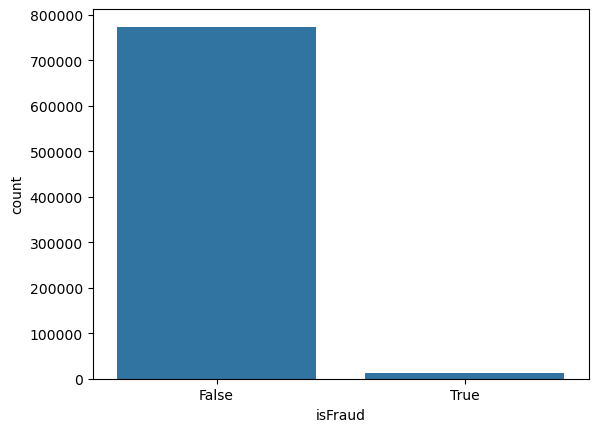

In [58]:
sns.countplot(x = "isFraud", data = df)
plt.show()

The dataset is highly imbalanced!

### Null values

In [61]:
#Check columns with null values
df.isnull().any()

accountNumber               False
customerId                  False
creditLimit                 False
availableMoney              False
transactionDateTime         False
transactionAmount           False
merchantName                False
acqCountry                  False
merchantCountryCode         False
posEntryMode                False
posConditionCode            False
merchantCategoryCode        False
currentExpDate              False
accountOpenDate             False
dateOfLastAddressChange     False
cardCVV                     False
enteredCVV                  False
cardLast4Digits             False
transactionType             False
echoBuffer                  False
currentBalance              False
merchantCity                False
merchantState               False
merchantZip                 False
cardPresent                 False
posOnPremises               False
recurringAuthInd            False
expirationDateKeyInMatch    False
isFraud                     False
dtype: bool

The dataset has no missing values.

### Unique values

In [64]:
#Check the number of unique values in each column
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch         2
isFraud             

Columns including echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, and recurringAuthInd have only 1 unique value. These columns have no predictive value so I will drop them.

In [66]:
#Drop columns that have only 1 value
cols_drop = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']
df = df.drop(columns=cols_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

### Empty strings

In [68]:
#Check columns with empty strings
(df == '').any()

accountNumber               False
customerId                  False
creditLimit                 False
availableMoney              False
transactionDateTime         False
transactionAmount           False
merchantName                False
acqCountry                   True
merchantCountryCode          True
posEntryMode                 True
posConditionCode             True
merchantCategoryCode        False
currentExpDate              False
accountOpenDate             False
dateOfLastAddressChange     False
cardCVV                     False
enteredCVV                  False
cardLast4Digits             False
transactionType              True
currentBalance              False
cardPresent                 False
expirationDateKeyInMatch    False
isFraud                     False
dtype: bool

There are 5 columns that have empty strings.

In [70]:
#Example
df['acqCountry'].value_counts()

acqCountry
US     774709
         4562
MEX      3130
CAN      2424
PR       1538
Name: count, dtype: int64

I will replace empty values with a placeholder called "UNKNOWN"

In [85]:
#Replace empty strings with 'UNKNOWN'
df = df.replace('', 'UNKNOWN')
#Check if the df still has empty strings
(df == '').any()

accountNumber               False
customerId                  False
creditLimit                 False
availableMoney              False
transactionDateTime         False
transactionAmount           False
merchantName                False
acqCountry                  False
merchantCountryCode         False
posEntryMode                False
posConditionCode            False
merchantCategoryCode        False
currentExpDate              False
accountOpenDate             False
dateOfLastAddressChange     False
cardCVV                     False
enteredCVV                  False
cardLast4Digits             False
transactionType             False
currentBalance              False
cardPresent                 False
expirationDateKeyInMatch    False
isFraud                     False
dtype: bool

In [87]:
#Example
df['acqCountry'].value_counts()

acqCountry
US         774709
UNKNOWN      4562
MEX          3130
CAN          2424
PR           1538
Name: count, dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [106]:
df.to_csv('../downloads/card_transaction_clean.csv', index=False)